In [1]:
%config InlineBackend.figure_formats = ['retina']

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_regression, f_classif
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import statsmodels.api as sm
from linearmodels import PanelOLS

In [137]:
data = pd.read_csv('data/dummies_26_04_2021.csv')
pdata = pd.read_csv('data/dummies_panel.csv')

# ANOVA F-value For Feature Selection
https://www.kaggle.com/prashant111/comprehensive-guide-on-feature-selection/notebook

In [138]:
X = data.drop(['Price/hour in USD', 'rating', 'nb_reviews', 'nb_projects', 'nb_buyers'], axis=1)
y = data['Price/hour in USD']
pdata['scraping_date'] = pd.to_datetime(pdata.scraping_date, dayfirst=True)
pdata = pdata.set_index(['name', 'scraping_date'])
pX = pdata.drop(['Price/hour in USD', 'rating', 'nb_reviews', 'nb_projects', 'nb_buyers'], axis=1)
pY = pdata['Price/hour in USD']

In [139]:
X.shape, y.shape, pX.shape, pY.shape

((5906, 391), (5906,), (11660, 385), (11660,))

Compute the ANOVA F-value for the provided sample.

The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different.

Compare Chi-Squared Statistics

## Compare the R^2 for different number of features

### With the simple data set

In [4]:
nb_features = X.shape[1] # because there we need to remove the y from the features

In [5]:
# Select Features With Best ANOVA F-Values
rsquared = []
selected_cols = {} # keys are the number of features and values are lists of the indices of the selected features
for i in range(0,nb_features,10):
    selector = SelectKBest(f_classif, k=i)
    selector.fit(X,y)
    cols = selector.get_support(indices=True)
    X_new = X.iloc[:,cols]
    X_new = X_new.assign(Intercept=1)
    model = sm.OLS(y, X_new).fit()
    rsquared.append(model.rsquared)
    selected_cols[i] = cols

Text(0, 0.5, 'R-squared')

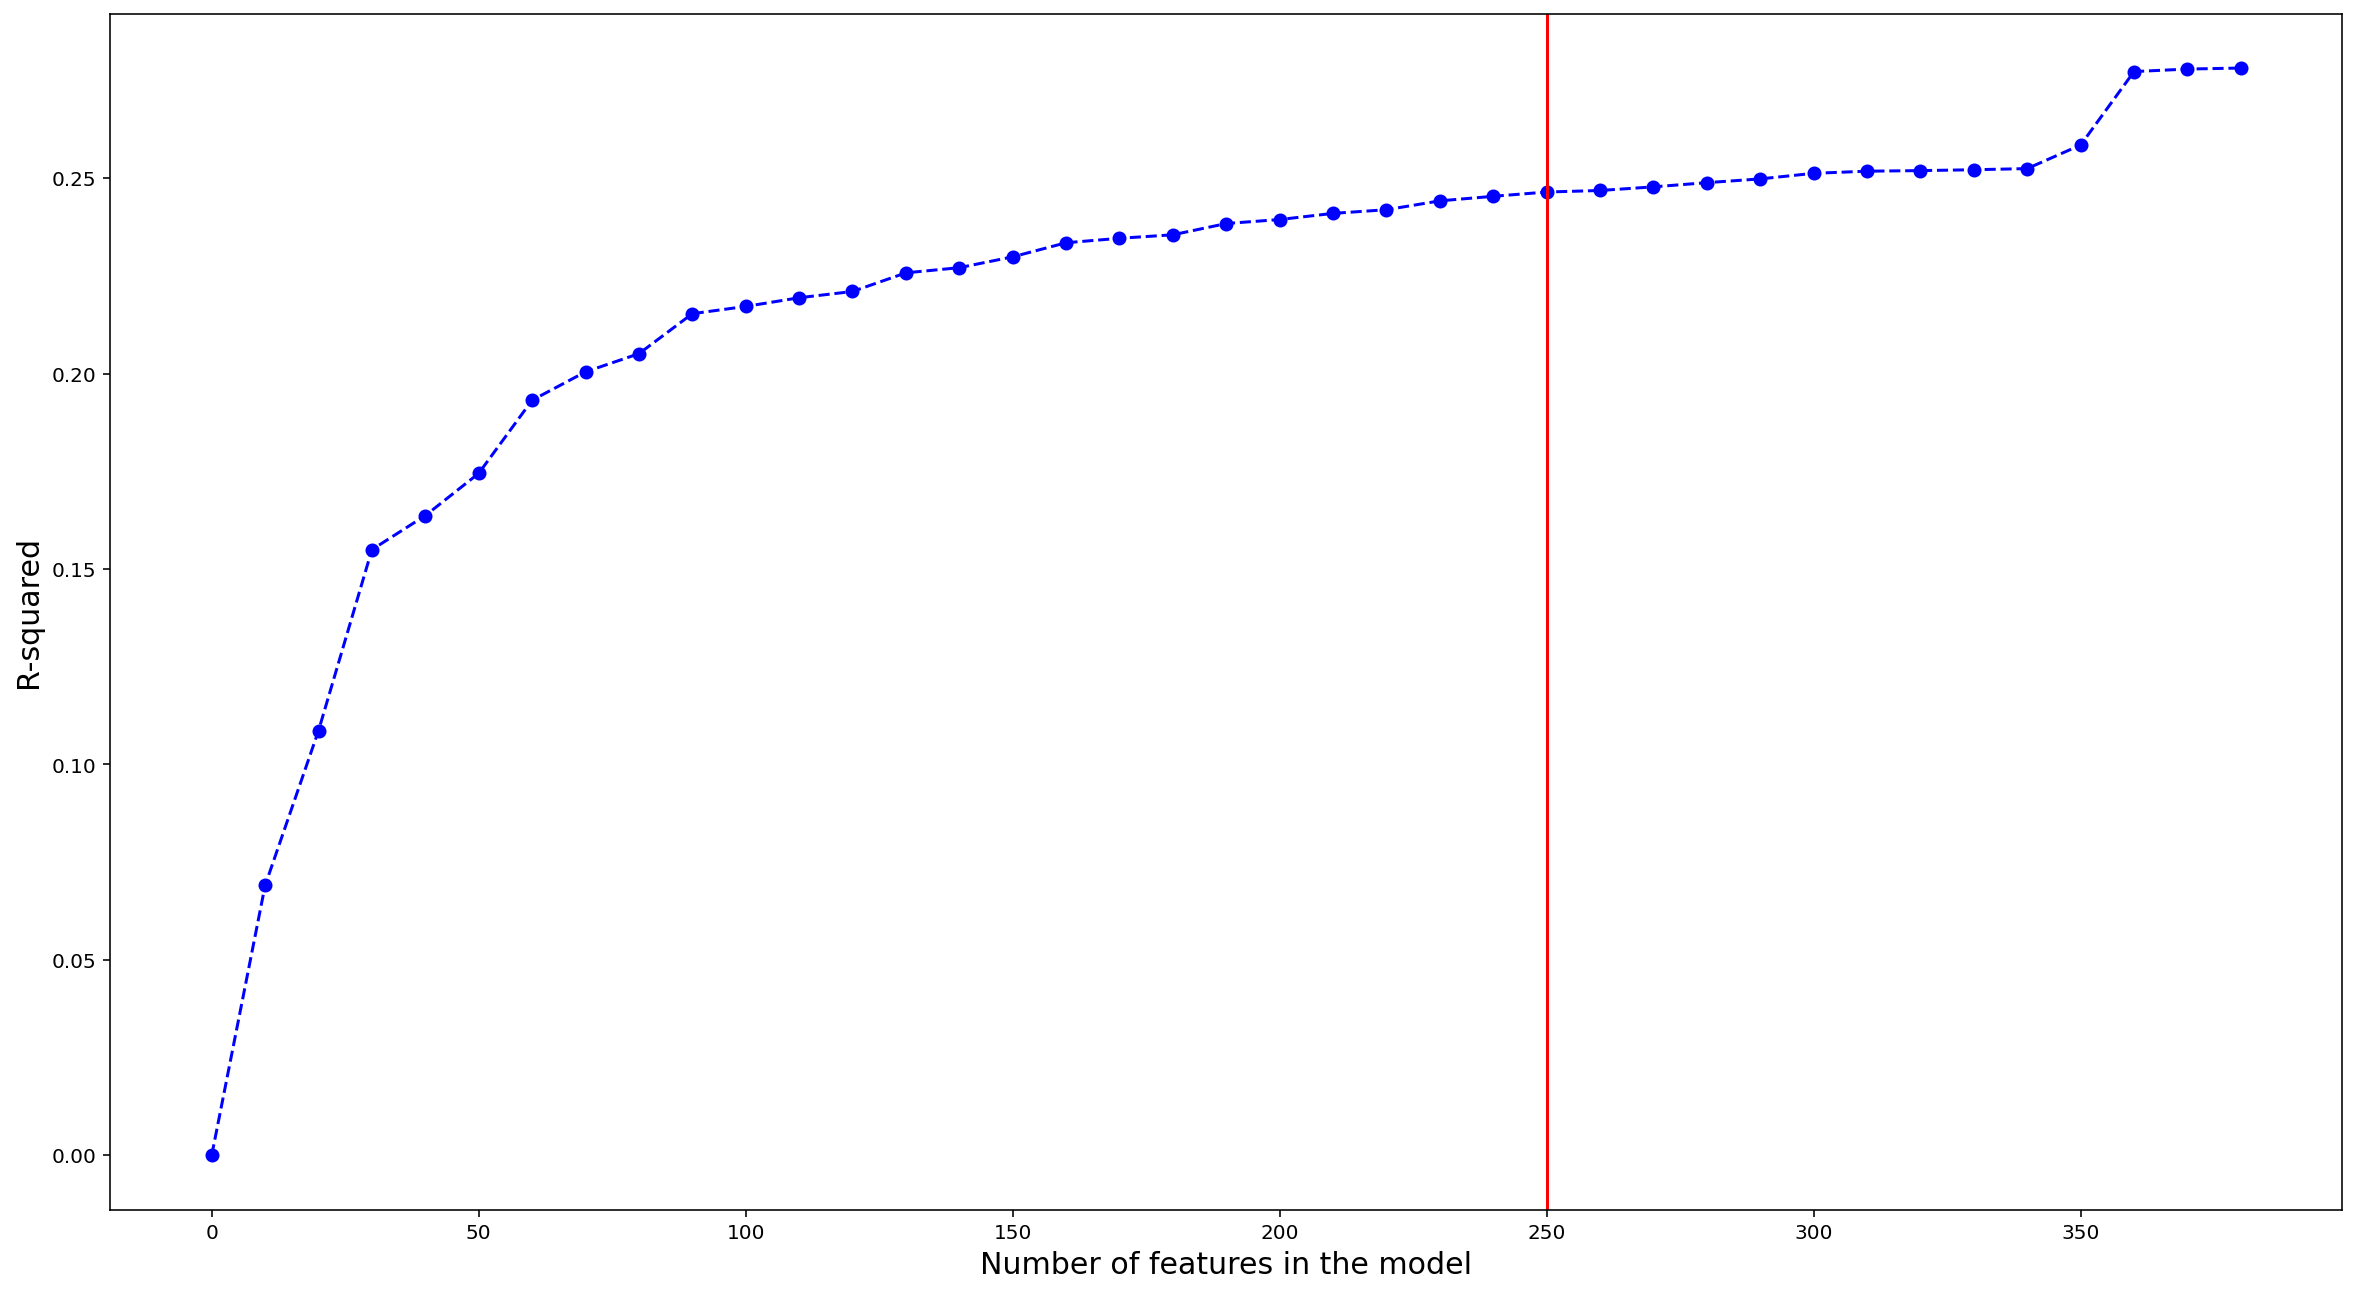

In [6]:
plt.figure(figsize=(20,11))
x = range(0,nb_features,10)
plt.plot(x,rsquared, '--', c='b', marker='o')
plt.xlabel('Number of features in the model', size=15)
plt.axvline(250, 0, 1, c='r')
plt.ylabel('R-squared', size=15)

From the plot, we can see that after 200 features, the $R^{2}$ is increasing slowly, therefore we could choose to use 250 features in our model. The selected features are as follows:

# Ordered the features with p-values

In [52]:
model = sm.OLS(y,X).fit()

In [54]:
sorted_features = model.pvalues.sort_values()

## Regression with the 100 most important features (with the lowest p-values)

In [94]:
nb_features_selected = 15
top_ft = sorted_features[:nb_features_selected]

if 'score' in top_100_ft and 'gender' in top_ft:
    ordered_features = ['score', 'gender'] + list(top_ft.drop(['score', 'gender']).index)
elif 'score' in top_ft:
    ordered_features = ['score', 'gender'] + list(top_ft.drop(['score']).index)
elif 'gender' in top_ft:
    ordered_features = ['score', 'gender'] + list(top_ft.drop(['gender']).index)
else:
    ordered_features = ['score', 'gender'] + list(top_ft.index)

In [95]:
X_cut = X[ordered_features]
X_cut = sm.add_constant(X_cut)
X_cut = X_cut

/Users/Victor/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [96]:
model_cut = sm.OLS(y,X_cut).fit()
print(model_cut.summary())

                            OLS Regression Results                            
Dep. Variable:      Price/hour in USD   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     87.25
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          3.32e-257
Time:                        22:39:41   Log-Likelihood:                -28807.
No. Observations:                5906   AIC:                         5.765e+04
Df Residuals:                    5889   BIC:                         5.776e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

# Optimization of R^2 for each feature category
The categories are: countries, skills, expertises and languages

## For the countries

In [8]:
selected_features = ['last_active','gender','score']
countries_rsquared = []
x_countries = []
for country in country_dummies.columns:
    if country not in data.columns:
        continue
    selected_features += [country]
    X_cut = X[selected_features]
    X_cut = X_cut.assign(Intercept=1)
    model = sm.OLS(y,X_cut).fit()
    countries_rsquared.append(model.rsquared)
    x_countries.append(len(selected_features))

## For the skills

In [9]:
selected_features = ['last_active','gender','score']
skills_rsquared = []
x_skills = []
for skill in skills_dummies.columns:
    if skill not in data.columns:
        continue
    selected_features += [skill]
    X_cut = X[selected_features]
    X_cut = X_cut.assign(Intercept=1)
    model = sm.OLS(y,X_cut).fit()
    skills_rsquared.append(model.rsquared)
    x_skills.append(len(selected_features))

## For the industry expertises

In [10]:
selected_features = ['last_active','gender','score']
exper_rsquared = []
x_exper = []
for exper in exper_dummies.columns:
    if exper not in data.columns:
        continue
    selected_features += [exper]
    X_cut = X[selected_features]
    X_cut = X_cut.assign(Intercept=1)
    model = sm.OLS(y,X_cut).fit()
    exper_rsquared.append(model.rsquared)
    x_exper.append(len(selected_features))

## For the languages

In [11]:
selected_features = ['last_active','gender','score']
lang_rsquared = []
x_lang = []
for lang in languages_dummies.columns:
    if lang not in data.columns:
        continue
    selected_features += [lang]
    X_cut = X[selected_features]
    X_cut = X_cut.assign(Intercept=1)
    model = sm.OLS(y,X_cut).fit()
    lang_rsquared.append(model.rsquared)
    x_lang.append(len(selected_features))

## Plot of the results

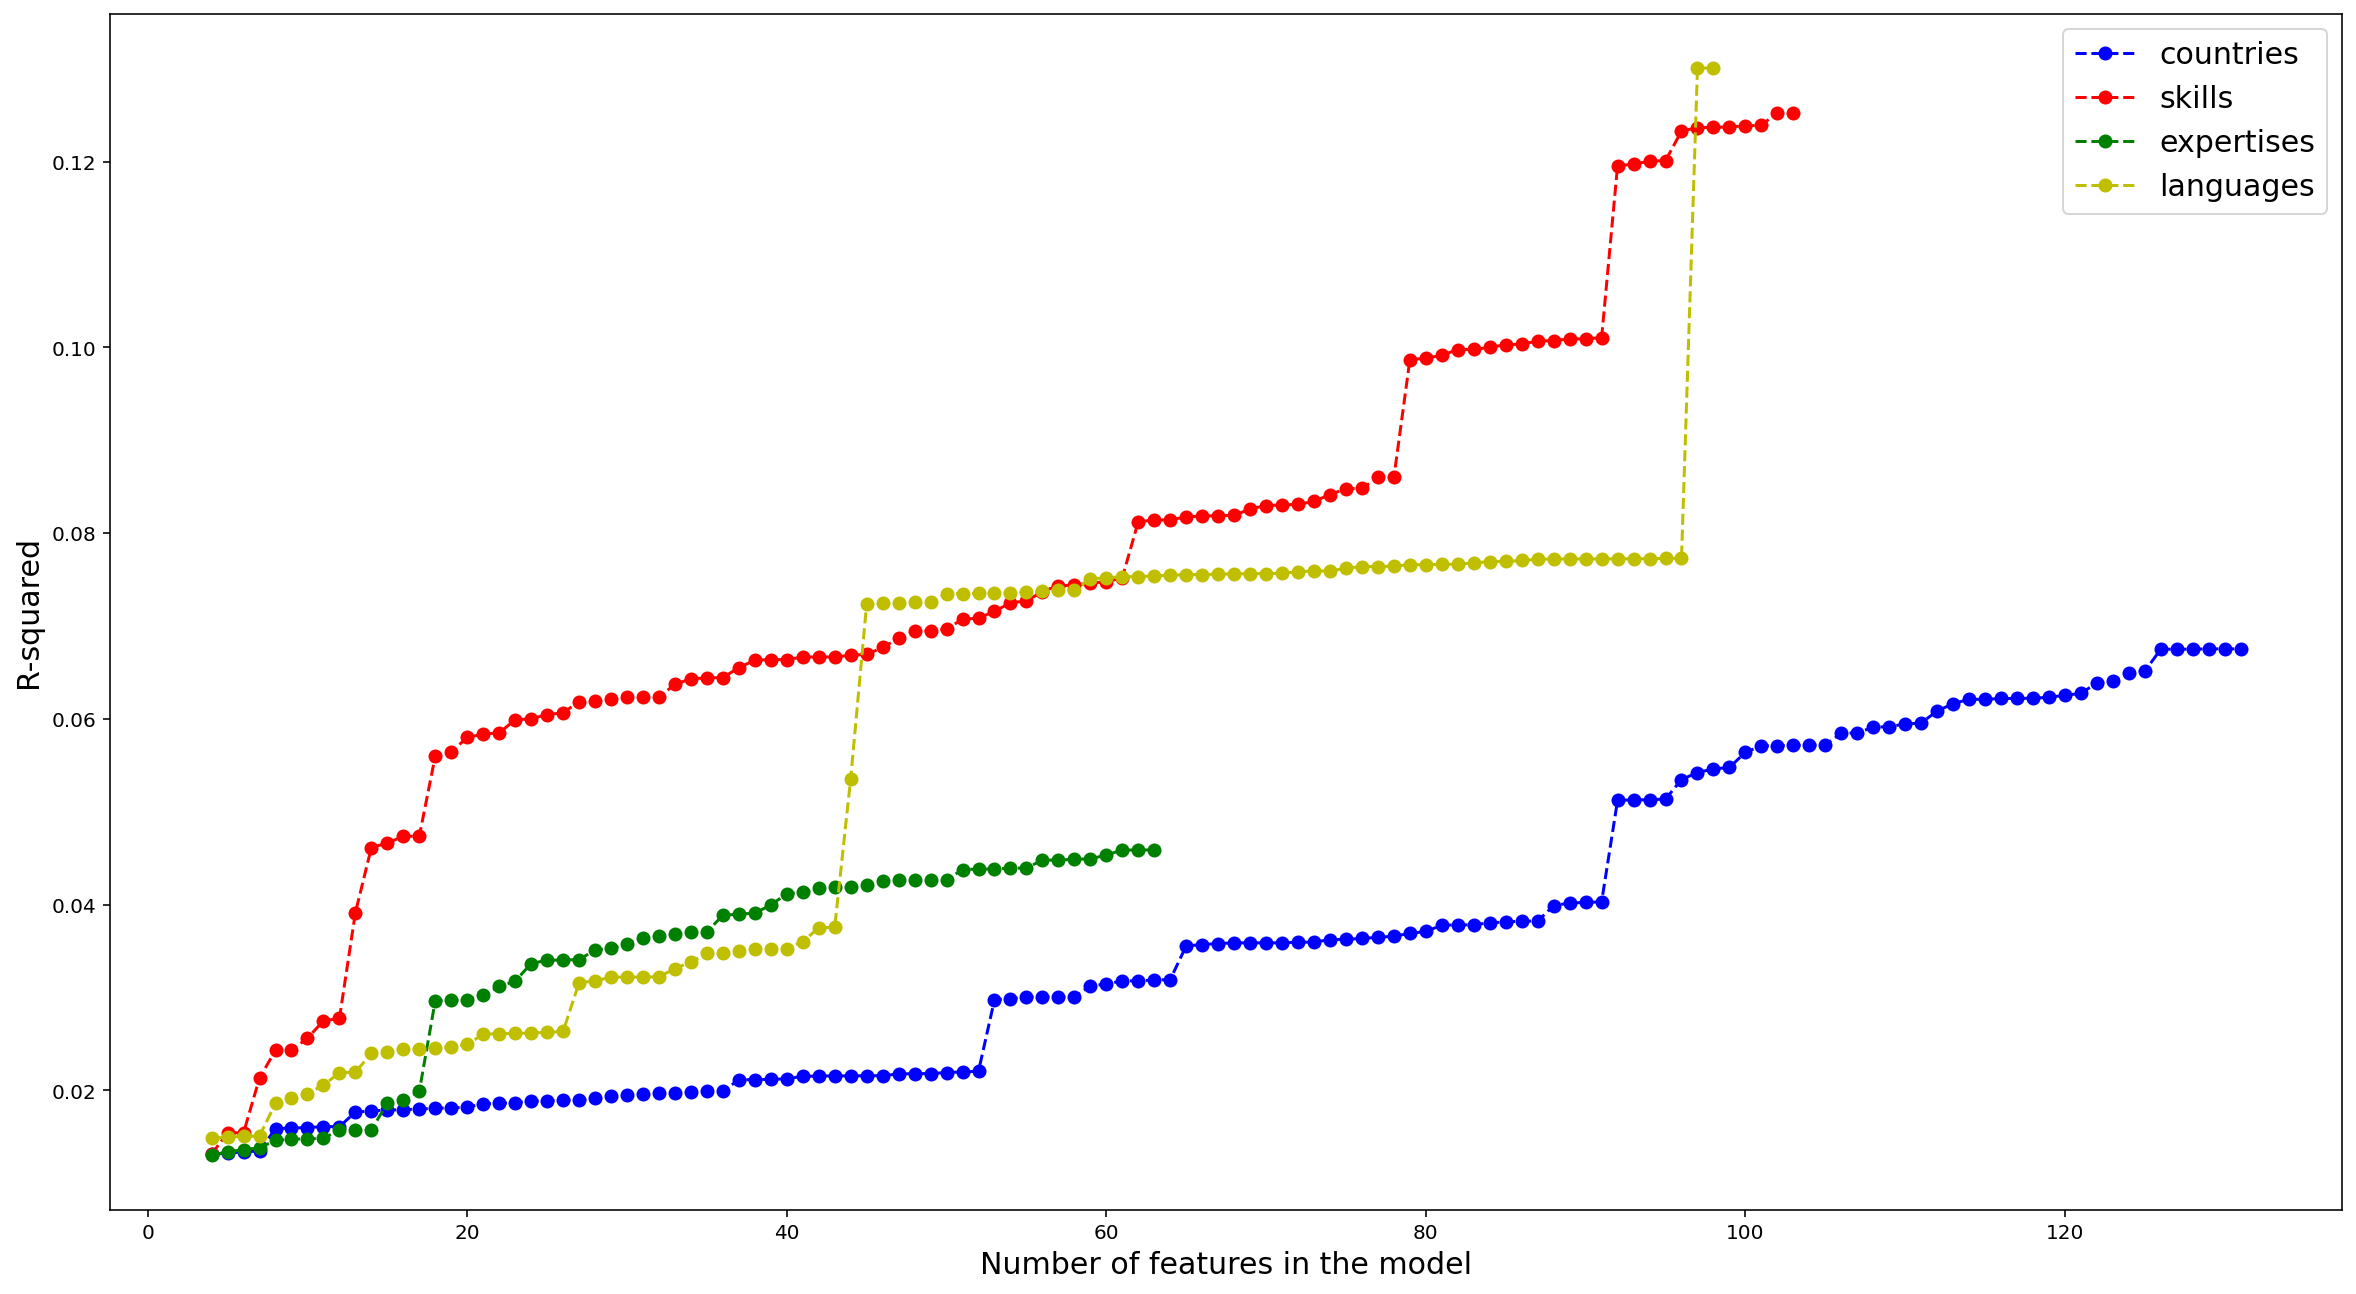

In [12]:
plt.figure(figsize=(20,11))
plt.plot(x_countries,countries_rsquared, '--', c='b', marker='o', label='countries')
plt.plot(x_skills,skills_rsquared, '--', c='r', marker='o', label='skills')
plt.plot(x_exper,exper_rsquared, '--', c='g', marker='o', label='expertises')
plt.plot(x_lang,lang_rsquared, '--', c='y', marker='o', label='languages')
plt.xlabel('Number of features in the model', size=15)
plt.ylabel('R-squared', size=15)
plt.legend(fontsize=15)

# Regression with the 250 best features

In [13]:
X_best = X.iloc[:,selected_cols[250]]
X_best = X_best.assign(Intercept=1)

In [14]:
model = sm.OLS(y,X_best).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Price/hour in USD   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     7.398
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          1.42e-201
Time:                        14:30:27   Log-Likelihood:                -28600.
No. Observations:                5906   AIC:                         5.770e+04
Df Residuals:                    5655   BIC:                         5.938e+04
Df Model:                         250                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [15]:
X_best.corr()

,last_active,gender,score,Algeria_country,Argentina_country,Australia_country,Austria_country,Belgium_country,Belize_country,Bulgaria_country,...,Hungarian_lang,Tamil_lang,Kannada_lang,Telugu_lang,Estonian_lang,Thai_lang,Nynorsk_lang,Akan_lang,Khmer_lang,Intercept
last_active,1.000000,-0.050581,0.206404,0.013788,0.027370,-0.019421,-0.023600,0.007707,-0.014837,-0.011680,...,-0.006410,0.003544,0.010361,0.002044,-0.002420,0.010361,0.011414,-0.002420,0.011414,NaN
gender,-0.050581,1.000000,-0.021573,0.001353,0.005161,0.013474,-0.004464,-0.009961,-0.015200,0.011110,...,-0.000554,-0.004464,-0.030275,0.001353,0.015758,-0.030275,-0.015200,-0.002870,-0.015200,NaN
score,0.206404,-0.021573,1.000000,0.015653,0.006080,0.000040,-0.009368,-0.008633,0.021165,-0.014284,...,-0.011929,0.007056,-0.004752,0.004185,0.004974,0.002601,-0.008053,-0.016883,-0.014326,NaN
Algeria_country,0.013788,0.001353,0.015653,1.000000,-0.001936,-0.002579,-0.001469,-0.001859,-0.000379,-0.002045,...,-0.001419,-0.001469,-0.001003,-0.000847,-0.000536,-0.001003,-0.000379,-0.000536,-0.000379,NaN
Argentina_country,0.027370,0.005161,0.006080,-0.001936,1.000000,-0.005892,-0.003355,-0.004248,-0.000865,-0.004671,...,-0.003241,0.047458,-0.002291,-0.001936,-0.001224,-0.002291,-0.000865,-0.001224,-0.000865,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thai_lang,0.010361,-0.030275,0.002601,-0.001003,-0.002291,-0.003052,-0.001738,-0.002200,-0.000448,-0.002420,...,-0.001679,-0.001738,-0.001187,-0.001003,-0.000634,1.000000,-0.000448,-0.000634,0.377772,NaN
Nynorsk_lang,0.011414,-0.015200,-0.008053,-0.000379,-0.000865,-0.001153,-0.000657,-0.000831,-0.000169,-0.000914,...,-0.000634,-0.000657,-0.000448,-0.000379,-0.000240,-0.000448,1.000000,-0.000240,-0.000169,NaN
Akan_lang,-0.002420,-0.002870,-0.016883,-0.000536,-0.001224,-0.001631,-0.000929,-0.001176,-0.000240,-0.001293,...,-0.000897,-0.000929,-0.000634,-0.000536,-0.000339,-0.000634,-0.000240,1.000000,-0.000240,NaN
Khmer_lang,0.011414,-0.015200,-0.014326,-0.000379,-0.000865,-0.001153,-0.000657,-0.000831,-0.000169,-0.000914,...,-0.000634,-0.000657,-0.000448,-0.000379,-0.000240,0.377772,-0.000169,-0.000240,1.000000,NaN


In [16]:
X_corr = X_best.drop('Intercept', axis=1)
test = np.array(X_corr.corr()-np.eye(X_corr.corr().shape[0]))
names = X_corr.columns

In [17]:
indices = np.argmax(test,axis=0)
values = np.max(test,axis=0)
for i,el in enumerate(values):
    if el>0.6:
        print('{} and {} are highly correlated: {}'.format(names[i], names[indices[i]], round(el,3)))

Greece_country and Greek_lang are highly correlated: 0.606
search engine optimization_skill and search engine optimization article_skill are highly correlated: 0.616
search engine optimization article_skill and search engine optimization_skill are highly correlated: 0.616
arabic  english translation_skill and Arabic_lang are highly correlated: 0.667
russian  english translation_skill and Russian_lang are highly correlated: 0.682
Russian_lang and russian  english translation_skill are highly correlated: 0.682
Arabic_lang and arabic  english translation_skill are highly correlated: 0.667
Greek_lang and Greece_country are highly correlated: 0.606
Czech_lang and Slovak_lang are highly correlated: 0.615
Slovak_lang and Czech_lang are highly correlated: 0.615
